# Convolution Example : Image Gaussian Blur

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime

In [2]:
def convolve2d_normal(X, W):
    t0 = datetime.now()
    
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1, j:j+m2] += X[i,j]*W
            
    print("elapsed time:", (datetime.now() - t0))
    return Y

In [3]:
def convolve2d_long(X, W):
    t0 = datetime.now()
    
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
    for i in range(n1 + m1 - 1):
        for ii in range(m1):
            for j in range(n2 + m2 - 1):
                for jj in range(m2):
                    if i >= ii and j >= jj and i - ii < n1 and j - jj < n2:
                        Y[i,j] += W[ii,jj]*X[i - ii,j - jj]
                        
    print("elapsed time:", (datetime.now() - t0))
    return Y

In [4]:
# smaller than input
def convolve2d_smaller(X, W):
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1, j:j+m2] += X[i,j]*W
            
    ret = Y[m1-1:-m1+1, m2-1:-m2+1]
    
    return ret

In [5]:
# same size as input
def convolve2d_same(X, W):
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1, j:j+m2] += X[i,j]*W
            
    ret = Y[m1//2:-m1//2+1, m2//2:-m2//2+1]
    
    assert(ret.shape == X.shape)
    return ret

## Blur Filters

(512, 512, 3)


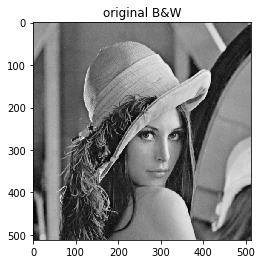

In [6]:
img = mpimg.imread('data/lena.png')
print(img.shape)

# make it B&W
bw = img.mean(axis=2)
plt.imshow(bw, cmap='gray')
plt.title("original B&W")
plt.show()

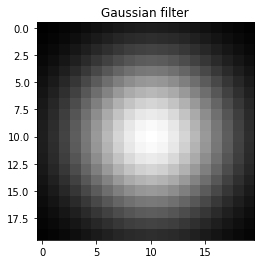

In [7]:
# create a Gaussian filter

N1 = N2 = 20
center = N1/2
W = np.zeros((N1, N2))
for i in range(N1):
    for j in range(N2):
        dist = (i - center)**2 + (j - center)**2  # square distance from the center
        W[i, j] = np.exp(-dist / 50.)
        
# normalize the kernel
W /= W.sum()

plt.imshow(W, cmap='gray')
plt.title("Gaussian filter")
plt.show()

elapsed time: 0:00:01.673469
(531, 531)


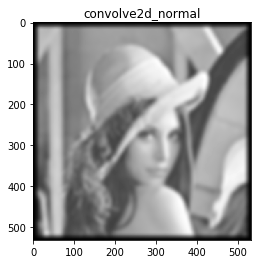

In [8]:
# convolution : normal
out = convolve2d_normal(bw, W)
print(out.shape)

plt.imshow(out, cmap='gray')
plt.title("convolve2d_normal")
plt.show()

(512, 512)


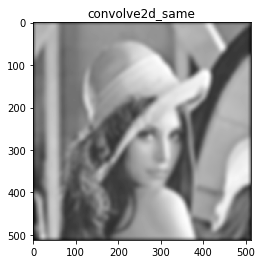

In [9]:
# convolution : same size
out = convolve2d_same(bw, W)
print(out.shape)

plt.imshow(out, cmap='gray')
plt.title("convolve2d_same")
plt.show()

(493, 493)


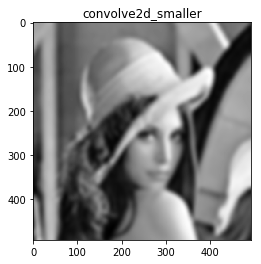

In [10]:
# convolution : smaller size
out = convolve2d_smaller(bw, W)
print(out.shape)

plt.imshow(out, cmap='gray')
plt.title("convolve2d_smaller")
plt.show()

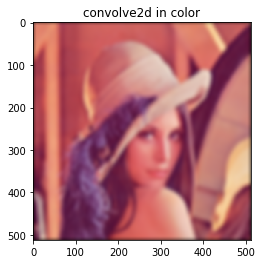

In [11]:
# try it in color

out = np.zeros(img.shape)
W /= W.sum()
for i in range(3):
    out[:,:,i] = convolve2d_same(img[:,:,i], W)
plt.imshow(out)
plt.title("convolve2d in color")
plt.show()